# Calculate dNdE spectra based on PPPC4DM Cirelli 

http://www.marcocirelli.net/PPPC4DMID.html

## Read in $\frac{dN}{dlog_{10}(x)}$ vs $dlog_{10}(x)$ spectra

In [1]:
import pandas as pd

In [184]:
data = pd.read_csv("AtProduction_positrons.dat",delim_whitespace=True)

In [185]:
data

,mDM,"Log[10,x]",eL,eR,e,\[Mu]L,\[Mu]R,\[Mu],\[Tau]L,\[Tau]R,...,Z,g,\[Gamma],h,\[Nu]e,\[Nu]\[Mu],\[Nu]\[Tau],V->e,V->\[Mu],V->\[Tau]
0,5,-8.90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,-8.85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5,-8.80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,5,-8.75,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,-8.70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,100000,-0.20,0.196376,0.234935,0.215656,1.052976,0.880394,0.966685,0.156982,0.209797,...,0.140910,0.000724,0.073318,0.079697,0.279774,0.305551,0.045413,3.065375,0.545889,0.036858
11094,100000,-0.15,0.296203,0.360556,0.328379,1.013196,0.662099,0.837648,0.124564,0.167061,...,0.135781,0.000315,0.075468,0.070337,0.405278,0.265745,0.033530,3.306824,0.368159,0.017765
11095,100000,-0.10,0.546637,0.678819,0.612728,0.864475,0.386220,0.625348,0.088998,0.119748,...,0.130616,0.000171,0.078510,0.061641,0.676879,0.196769,0.022142,3.376433,0.223098,0.007578
11096,100000,-0.05,2.186938,2.860477,2.523707,0.539523,0.119781,0.329652,0.054492,0.073876,...,0.114901,0.000185,0.077358,0.048000,1.549346,0.090017,0.011606,3.153355,0.117595,0.002795


### Example for annihilation to Z and $m_{DM}=900\,GeV$

In [186]:
data[data['mDM']==900][['Log[10,x]','Z']]

,"Log[10,x]",Z
6981,-8.90,0.000016
6982,-8.85,0.000019
6983,-8.80,0.000024
6984,-8.75,0.000029
6985,-8.70,0.000034
...,...,...
7155,-0.20,0.118486
7156,-0.15,0.118076
7157,-0.10,0.118132
7158,-0.05,0.114912


In [187]:
z900 = data[data['mDM']==900][['Log[10,x]','Z']].to_numpy().T

<IPython.core.display.Javascript object>


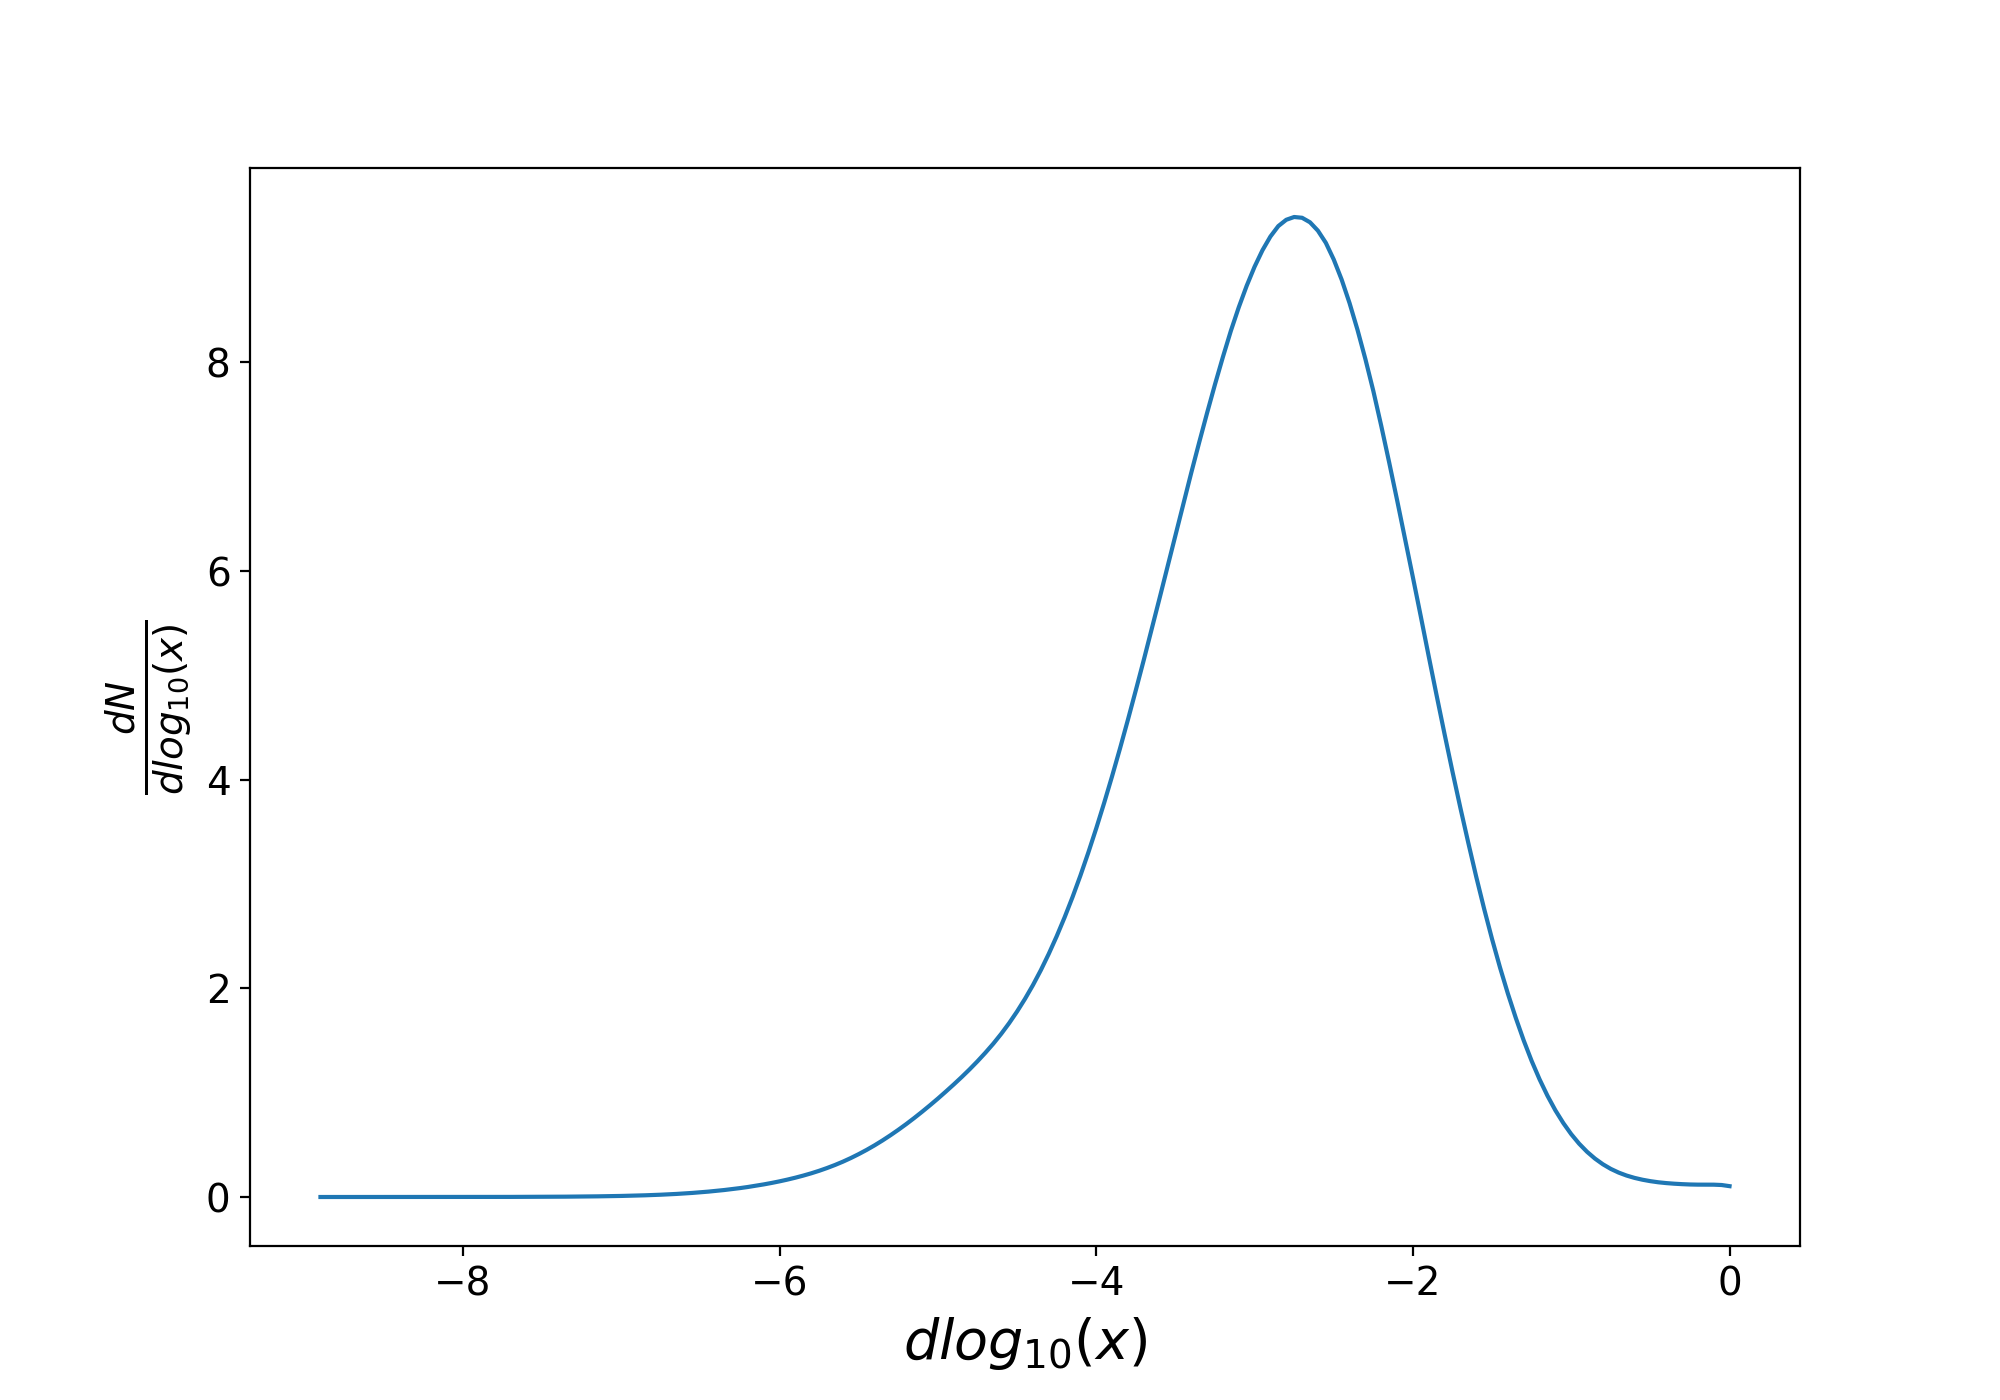

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(z900[0],z900[1])
plt.xlabel(r'$dlog_{10}(x)$',fontsize=20)
plt.ylabel(r'$\frac{dN}{dlog_{10}(x)}$',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [189]:
log10x = z900[0]
dNdlog10x = z900[1]

## Get $\frac{dN}{log(x)dE}$ vs $log_{10}(E)$

\begin{align}
log_{10}(x) &= X = log_{10}(\frac{E}{m_{DM}}) \\
\Leftrightarrow 10^X &= \frac{E}{m_{DM}} \\
\Leftrightarrow log_{10}(E) &= log_{10}(10^X m_{DM})
\end{align} 

In [190]:
import numpy as np
logE = np.log10(10**log10x*900)

\begin{align}
\frac{dN}{dx} &= \frac{dN}{dlog_{10}(x)}\frac{dlog_{10}(x)}{dx} \\
&= \frac{dN}{dlog_{10}(x)}\frac{dlog_{e}(x)}{dx} \frac{1}{log_{e}(10)}\\
&= \frac{dN}{dlog_{10}(x)}\frac{1}{log_{e}(10)x} \\
&= \frac{dN}{dlog_{10}(x)}\frac{1}{log_{e}(10)10^{log_{10}(x)}}
\end{align}

\begin{align}
\frac{dN}{dx} &= \frac{dN}{dE} m_\chi \\
\frac{dN}{dE} &= \frac{dN}{dlog_{10}(x)}\frac{1}{log_{e}(10)10^{log_{10}(x)} m_\chi}\\
\end{align}

In [191]:
dNdE = 1/(900*10**log10x*np.log(10))*dNdlog10x

<IPython.core.display.Javascript object>


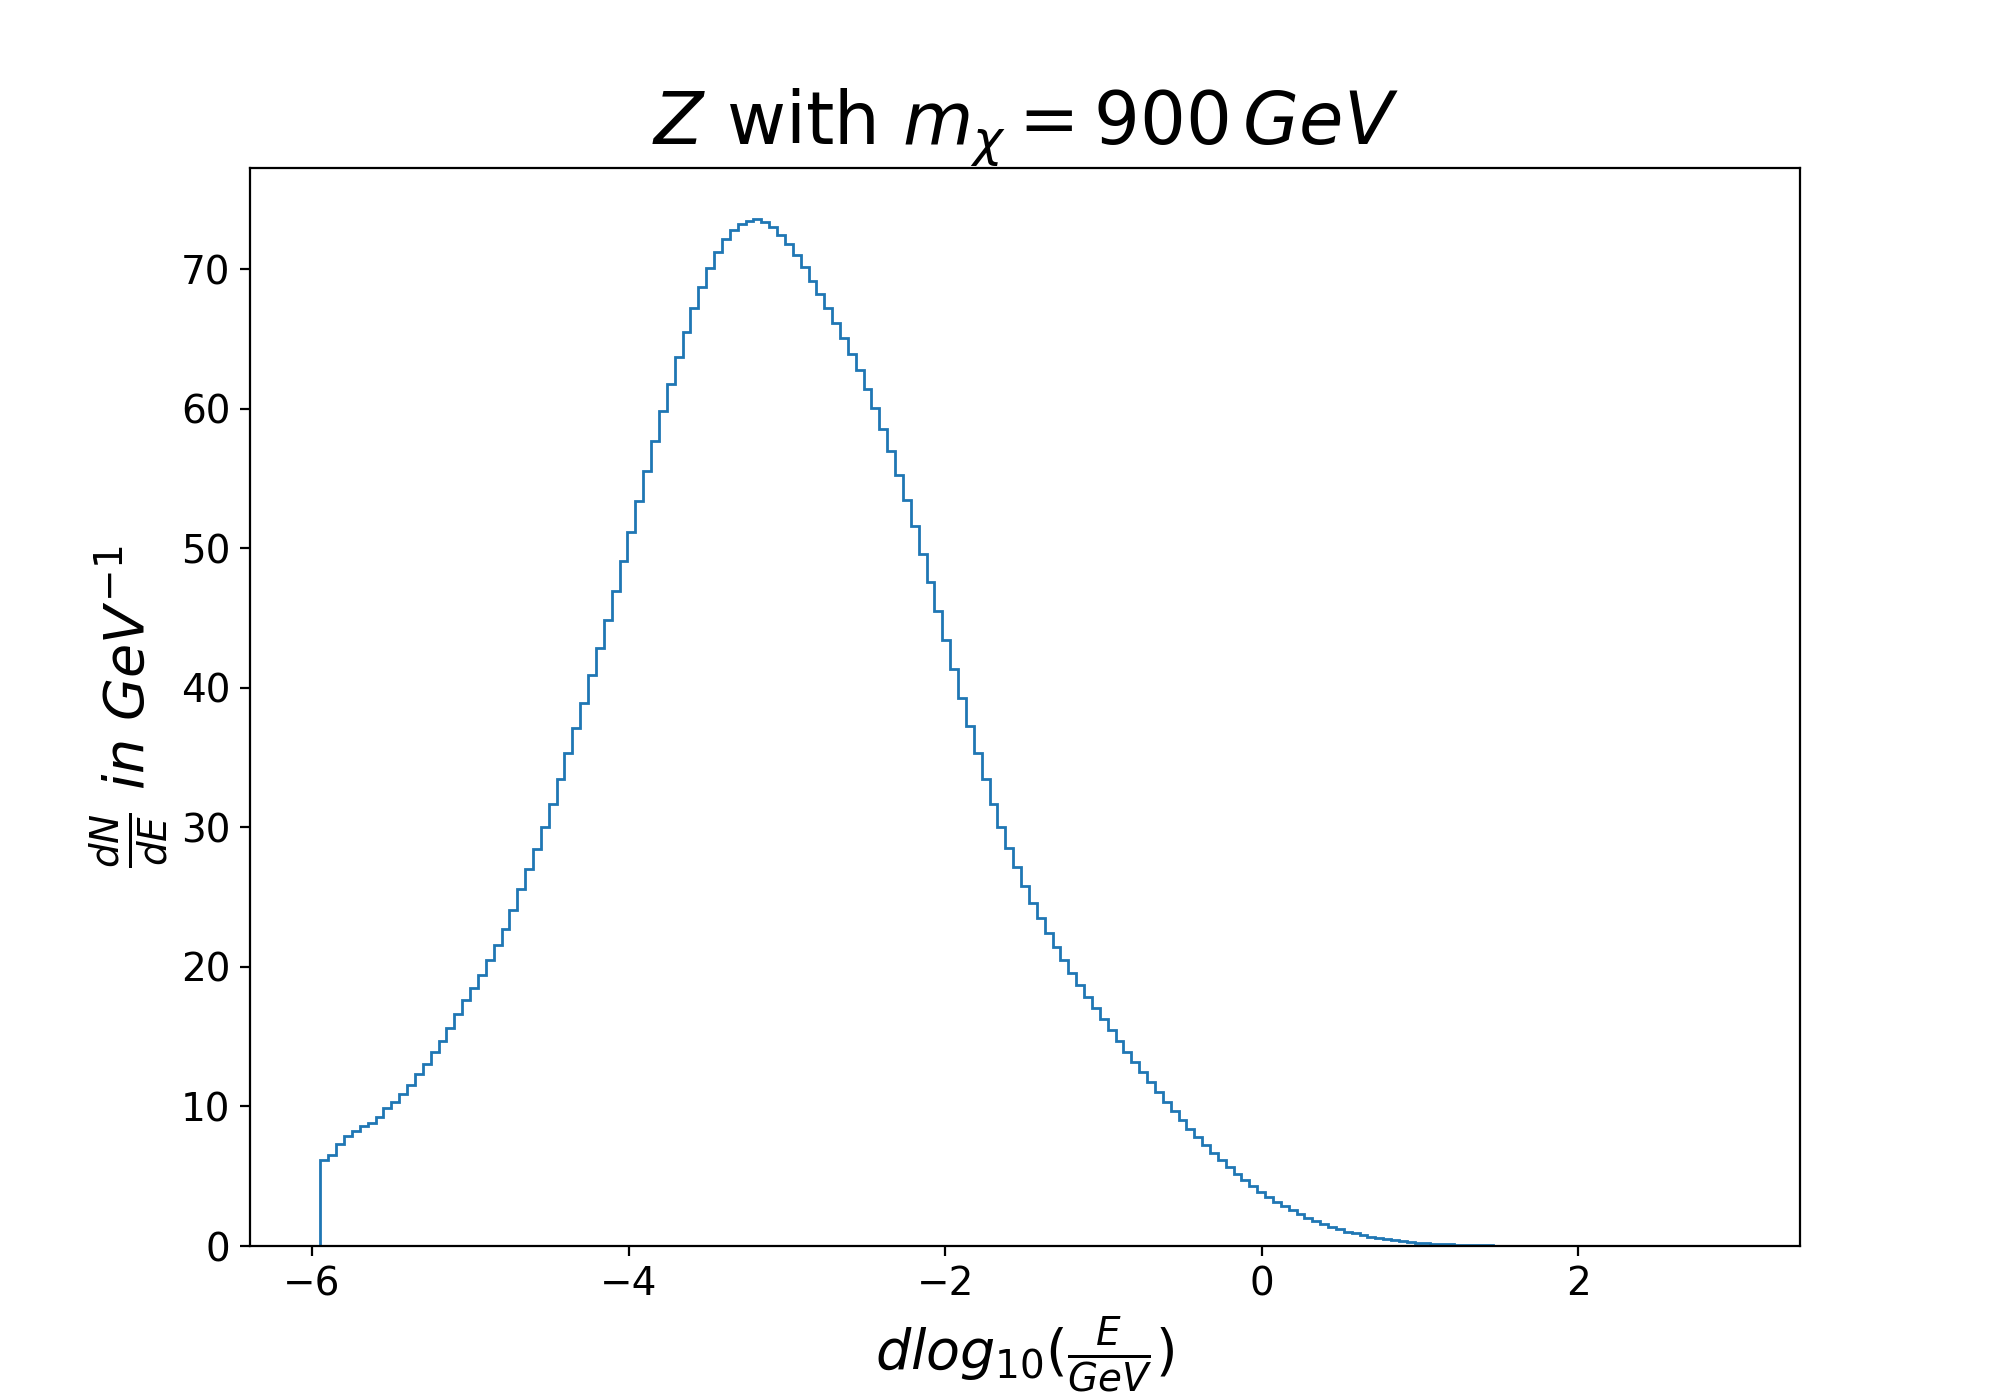

In [192]:
plt.figure(figsize=(10,7))
#plt.plot(logE,dNdE)
plt.hist(logE, bins=179,weights=dNdE,histtype='step')
plt.xlabel(r'$dlog_{10}(\frac{E}{GeV})$',fontsize=20)
plt.ylabel(r'$\frac{dN}{dE} \,\,in \,\,{GeV}^{-1}$',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'$Z$ with $m_\chi=900\,GeV$',fontsize=26)
plt.savefig('z900_e.pdf')
plt.show()

## Write root file

In [18]:
import ROOT

In [19]:
particle = 'ZZ'
mass = 900
hist = ROOT.TH1F("hdNdE",f"dN/dE for {particle}, m = {mass:.1f} GeV",len(logE)-1,logE)

NameError: name 'logE' is not defined

In [13]:
for i in range(len(logE)):
    hist.SetBinContent(i+1,dNdE[i])

In [14]:
outFile = ROOT.TFile.Open(f'dNdESignal_{particle}_{mass:.1f}mass.root','RECREATE')
outFile.cd()
hist.Write()
outFile.Close()

# ALL Spectra

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("AtProduction_positrons.dat",delim_whitespace=True)
# data['log10E'] = np.log10(10**data['Log[10,x]']*900)

In [2]:
def log10E(log10x,mass):
    return np.log10(10**log10x*mass)

In [3]:
def dNdE(dNdlog10x,log10x,mass):
    return 1/(mass*10**log10x*np.log(10))*dNdlog10x

In [4]:
for column in data:
    skip = ['mDM','log10E']
    if column in skip:
        continue
    if column == 'Log[10,x]':
        data['log10E'] = np.vectorize(log10E)(data[column],data['mDM'])
        continue
    data[column] = np.vectorize(dNdE)(data[column],data['Log[10,x]'],data['mDM'])

In [5]:
import ROOT
# log10E = np.unique(data['log10E'])
for mass in np.unique(data['mDM']):
    log10E = np.unique(data['log10E'][data['mDM']==mass])
    for column in data:
        skip = ['mDM', 'Log[10,x]','log10E']
        if column in skip:
            continue
        hist = ROOT.TH1F("hdNdE",f"dN/dE for {column}, m = {mass:.1f} GeV",len(log10E)-1,log10E)
#         print(mass)
#         print(column)
        for i in range(len(log10E)):
#             print(i)
            hist.SetBinContent(i+1,data[column][data['mDM']==mass].to_numpy()[i])
        outFile = ROOT.TFile.Open(f'electrons/dNdESignal_{column}_{mass:.1f}mass.root','RECREATE')
        outFile.cd()
        hist.Write()
        outFile.Close()

Welcome to JupyROOT 6.26/04


Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdNdE (Potential memory leak).
Warn

In [10]:
f = ROOT.TFile.Open(f'electrons/dNdESignal_Z_900.0mass.root', 'READ')

hist = f.Get('hdNdE')
hist.SetDirectory(0)
f.Close()

In [11]:
%jsroot on
c = ROOT.TCanvas()
hist.Draw()
c.Draw()

In [31]:
f = ROOT.TFile.Open(f'Cirelli/dNdESignal_bb_1700.0mass.root', 'READ')

hist = f.Get('hdNdE')
hist.SetDirectory(0)
f.Close()

In [32]:
%jsroot on
c = ROOT.TCanvas()
hist.Draw()
c.Draw()